In [1]:
from matplotlib import pyplot as plt
import sys
import pandas as pd
import numpy as np
import math

sys.path.append('../..')

from heat_load_calc.solar_shading import SolarShading
from heat_load_calc.direction import Direction

In [2]:
plt.style.use('seaborn-whitegrid')

# 無限に長い庇による天空日射の遮へい効果の計算

<div style="text-align: right;">佐藤エネルギーリサーチ（株）</div>

## はじめに

無限に長い庇について、天空日射に対する遮へい効果の計算法について述べる。

## 各部寸法

窓、庇共に無限に長いと仮定し、下図のような寸法が与えられるとする。

<img src="eaves.png" width=20%>

<div style="text-align: center;">図 1　無限に長い庇の寸法</div>

## 形態係数の計算方法

窓、庇が無限に続くと仮定したため、2次元で扱えばよい。クロス・ストリング法を適用すると、窓から庇を見る形態係数は下式となる。

$$
   \begin{split}
   \varphi &= \frac{ ( AC + BD ) - ( AD + BC ) }{ 2 DC } \\
      &= \frac{ ( ( y_1 + y_w ) + \sqrt{ y_1^2 + z^2 } )- ( y_1 + \sqrt{ ( y_1 + y_w )^2 + z^2  } ) }{ 2 y_w }
   \end{split}
$$

ここで、

$\varphi$：	窓から庇を見る形態係数 -

## 無限に長い庇があるときの窓の天空透過日射熱取得

無限に長い庇があるときの窓の天空透過日射熱取得は下式となる。

$$ Q_{GT,d} = A \cdot ( 1 - \varphi ) \cdot \tau_N \cdot c \cdot I_d $$

ここで、  
$Q_{GT,d}$：天空透過日射熱取得, W
$A$：窓面積, m<sup>2</sup>  
$\tau_N$：窓の垂直入射時透過率, -  
$c$：窓の拡散光に対する入射角特性  
$I_d$：窓に入射する天空日射, W/m<sup>2</sup>

## Example

計算例  
- 方位角 0度
- 庇の深さ 1.0m
- 窓の高さ 2.0m
- 窓上端から庇の付け根までの長さ 0.2m

In [3]:
ssp_dict={'existence': True, 'input_method': 'simple', 'depth': 1.0, 'd_h': 2.0, 'd_e': 0.2}

In [4]:
# 気象データ読み込み
d_weather = pd.read_csv('climateData_6.csv')
h_rad = np.radians(d_weather['太陽高度角[度]'].values)
a_rad = np.radians(d_weather['太陽方位角[度]'].values)

### 直達日射

In [5]:
r_s = SolarShading.create(ssp_dict=ssp_dict, direction=Direction.S).get_f_ss_d_j_ns(h_sun_n=h_rad, a_sun_n=a_rad)[0:24]
r_sw = SolarShading.create(ssp_dict=ssp_dict, direction=Direction.SW).get_f_ss_d_j_ns(h_sun_n=h_rad, a_sun_n=a_rad)[0:24]
r_w = SolarShading.create(ssp_dict=ssp_dict, direction=Direction.W).get_f_ss_d_j_ns(h_sun_n=h_rad, a_sun_n=a_rad)[0:24]
r_nw = SolarShading.create(ssp_dict=ssp_dict, direction=Direction.NW).get_f_ss_d_j_ns(h_sun_n=h_rad, a_sun_n=a_rad)[0:24]
r_n = SolarShading.create(ssp_dict=ssp_dict, direction=Direction.N).get_f_ss_d_j_ns(h_sun_n=h_rad, a_sun_n=a_rad)[0:24]
r_ne = SolarShading.create(ssp_dict=ssp_dict, direction=Direction.NE).get_f_ss_d_j_ns(h_sun_n=h_rad, a_sun_n=a_rad)[0:24]
r_e = SolarShading.create(ssp_dict=ssp_dict, direction=Direction.E).get_f_ss_d_j_ns(h_sun_n=h_rad, a_sun_n=a_rad)[0:24]
r_se = SolarShading.create(ssp_dict=ssp_dict, direction=Direction.SE).get_f_ss_d_j_ns(h_sun_n=h_rad, a_sun_n=a_rad)[0:24]


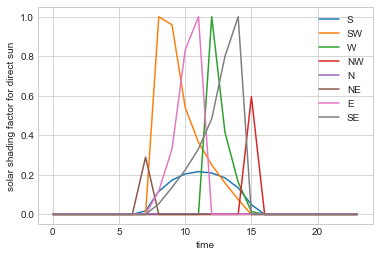

In [6]:
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.plot(r_s, label='S')
ax1.plot(r_sw, label='SW')
ax1.plot(r_w, label='W')
ax1.plot(r_nw, label='NW')
ax1.plot(r_n, label='N')
ax1.plot(r_ne, label='NE')
ax1.plot(r_e, label='E')
ax1.plot(r_se, label='SE')

ax1.set_xlabel('time')
ax1.set_ylabel('solar shading factor for direct sun')

plt.legend()
plt.show()

### 天空放射

In [7]:
SolarShading.create(ssp_dict=ssp_dict, direction=Direction.S).get_f_ss_s_j()

0.15079867699991067

庇の長さを0.0mから3.0mまで0.1m刻みで振る

In [8]:
zs = [float(x) / 10.0 for x in range(0, 31)]

In [9]:
sss06 = [
    SolarShading.create(ssp_dict={'existence': True, 'input_method': 'simple', 'depth': z, 'd_h': 0.6, 'd_e': 0.0}, direction=Direction.S)
    for z in zs
]
sss12 = [
    SolarShading.create(ssp_dict={'existence': True, 'input_method': 'simple', 'depth': z, 'd_h': 1.2, 'd_e': 0.0}, direction=Direction.S)
    for z in zs
]
sss20 = [
    SolarShading.create(ssp_dict={'existence': True, 'input_method': 'simple', 'depth': z, 'd_h': 2.0, 'd_e': 0.0}, direction=Direction.S)
    for z in zs
]

In [10]:
fs06 = [ss.get_f_ss_s_j() for ss in sss06]
fs12 = [ss.get_f_ss_s_j() for ss in sss12]
fs20 = [ss.get_f_ss_s_j() for ss in sss20]

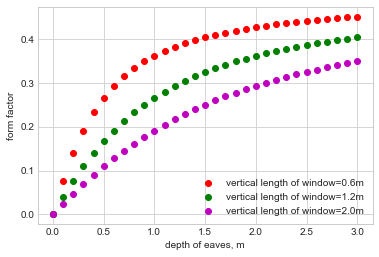

In [11]:
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.scatter(zs, fs06, c="r", label="vertical length of window=0.6m")
ax1.scatter(zs, fs12, c="g", label="vertical length of window=1.2m")
ax1.scatter(zs, fs20, c="m", label="vertical length of window=2.0m")

ax1.set_xlabel('depth of eaves, m')
ax1.set_ylabel('form factor')

plt.legend()
plt.show()